In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv('alcohol Sales.csv')
df

,DATE,S4248SM144NCEN
0,1992-01-01,3459
1,1992-02-01,3458
2,1992-03-01,4002
3,1992-04-01,4564
4,1992-05-01,4221
...,...,...
320,2018-09-01,12396
321,2018-10-01,13914
322,2018-11-01,14174
323,2018-12-01,15504


In [4]:
df.columns=['Date','Sales']
df

,Date,Sales
0,1992-01-01,3459
1,1992-02-01,3458
2,1992-03-01,4002
3,1992-04-01,4564
4,1992-05-01,4221
...,...,...
320,2018-09-01,12396
321,2018-10-01,13914
322,2018-11-01,14174
323,2018-12-01,15504


In [5]:
df['Date']=pd.to_datetime(df['Date'],format='%Y-%m-%d')
df.dtypes

Date     datetime64[ns]
Sales             int64
dtype: object

In [6]:
df.set_index('Date',inplace=True)
df

,Sales
Date,
1992-01-01,3459
1992-02-01,3458
1992-03-01,4002
1992-04-01,4564
1992-05-01,4221
...,...
2018-09-01,12396
2018-10-01,13914
2018-11-01,14174


C:\Users\sanka\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Sales')

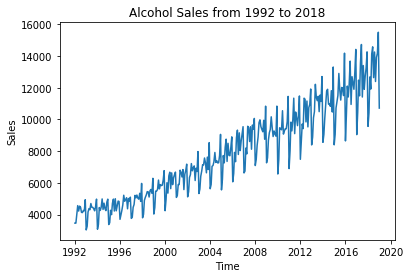

In [7]:
plt.plot(df)
plt.title('Alcohol Sales from 1992 to 2018')
plt.xlabel('Time')
plt.ylabel('Sales')

In [22]:
df_diff=df.diff(periods=8)
df_diff

,Sales
Date,
1992-01-01,NaN
1992-02-01,NaN
1992-03-01,NaN
1992-04-01,NaN
1992-05-01,NaN
...,...
2018-09-01,2832.0
2018-10-01,3499.0
2018-11-01,1491.0


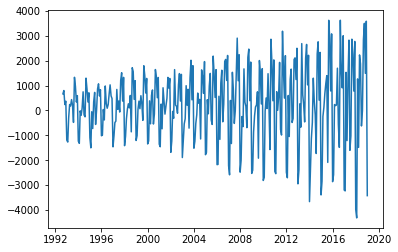

In [23]:
plt.plot(df_diff)

In [24]:
df.head()

,Sales
Date,
1992-01-01,3459
1992-02-01,3458
1992-03-01,4002
1992-04-01,4564
1992-05-01,4221


In [26]:
df.shape

(325, 1)

In [27]:
df.describe()

,Sales
count,325.000000
mean,7886.400000
std,2914.269061
min,3031.000000
25%,5231.000000
50%,7481.000000
75%,9977.000000
max,15504.000000


In [25]:
X=df.values
X

array([[ 3459],
       [ 3458],
       [ 4002],
       [ 4564],
       [ 4221],
       [ 4529],
       [ 4466],
       [ 4137],
       [ 4126],
       [ 4259],
       [ 4240],
       [ 4936],
       [ 3031],
       [ 3261],
       [ 4160],
       [ 4377],
       [ 4307],
       [ 4696],
       [ 4458],
       [ 4457],
       [ 4364],
       [ 4236],
       [ 4500],
       [ 4974],
       [ 3075],
       [ 3377],
       [ 4443],
       [ 4261],
       [ 4460],
       [ 4985],
       [ 4324],
       [ 4719],
       [ 4374],
       [ 4248],
       [ 4784],
       [ 4971],
       [ 3370],
       [ 3484],
       [ 4269],
       [ 3994],
       [ 4715],
       [ 4974],
       [ 4223],
       [ 5000],
       [ 4235],
       [ 4554],
       [ 4851],
       [ 4826],
       [ 3699],
       [ 3983],
       [ 4262],
       [ 4619],
       [ 5219],
       [ 4836],
       [ 4941],
       [ 5062],
       [ 4365],
       [ 5012],
       [ 4850],
       [ 5097],
       [ 3758],
       [ 3825],
       [

In [29]:
train=X[0:250]
test=X[250:]
train.shape

(250, 1)

In [30]:
test.shape

(75, 1)

In [31]:
from statsmodels.tsa.arima_model import ARIMA


In [57]:
arima=ARIMA(train,order=(10,1,8))
arima_fit=arima.fit()
arima_fit.aic


3749.8934360530093

In [58]:
predictions=arima_fit.forecast(steps=75)[0]
predictions

array([11047.0025534 , 10705.2766758 ,  8588.99567174,  9317.44340729,
        9215.05331911, 10651.66332714, 11106.73527522, 11377.82309528,
       10593.13913406, 11106.0704634 ,  9937.76143561, 11036.86960577,
       11406.9316029 , 10773.22971795,  9040.48798889,  9617.87138662,
        9371.27211301, 11019.73366339, 11420.74103065, 11575.0202664 ,
       10968.97130895, 11337.79128649, 10152.91476709, 11477.56237948,
       11626.39527171, 10935.07011585,  9476.75924758,  9876.58819366,
        9555.7339556 , 11418.84063747, 11669.73959502, 11813.04972424,
       11356.34516997, 11522.34657462, 10410.95454564, 11917.52964891,
       11797.42694676, 11152.7417006 ,  9907.30100306, 10082.52088968,
        9796.7239925 , 11813.96935844, 11871.49262831, 12102.07281788,
       11731.74051544, 11671.75996688, 10723.16877585, 12332.05125907,
       11936.65333834, 11432.58997412, 10308.01807641, 10255.07513139,
       10098.76214375, 12180.5456763 , 12046.71828615, 12444.9168301 ,
      

In [59]:
test

array([[10953],
       [11922],
       [ 8395],
       [ 8888],
       [10110],
       [10493],
       [12218],
       [11385],
       [11186],
       [11462],
       [10494],
       [11540],
       [11138],
       [12709],
       [ 8557],
       [ 9059],
       [10055],
       [10977],
       [11792],
       [11904],
       [10965],
       [10981],
       [10828],
       [11817],
       [10470],
       [13310],
       [ 8400],
       [ 9062],
       [10722],
       [11107],
       [11508],
       [12904],
       [11869],
       [11224],
       [12022],
       [11983],
       [11506],
       [14183],
       [ 8648],
       [10321],
       [12107],
       [11420],
       [12238],
       [13681],
       [10950],
       [12700],
       [12272],
       [11905],
       [13016],
       [14421],
       [ 9043],
       [10452],
       [12481],
       [11491],
       [13545],
       [14730],
       [11416],
       [13402],
       [11907],
       [12711],
       [13261],
       [14265],
       [

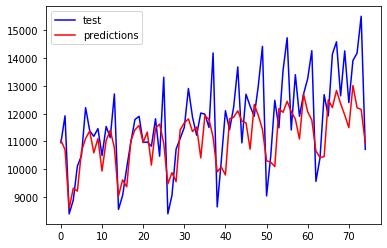

In [60]:
plt.plot(test,color='blue',label='test')
plt.plot(predictions,color='red',label='predictions')
plt.legend()


In [45]:
p=d=q=range(0,9)
import itertools
pdq=list(itertools.product(p,d,q))
pdq

[(0, 0, 0),
 (0, 0, 1),
 (0, 0, 2),
 (0, 0, 3),
 (0, 0, 4),
 (0, 0, 5),
 (0, 0, 6),
 (0, 0, 7),
 (0, 0, 8),
 (0, 1, 0),
 (0, 1, 1),
 (0, 1, 2),
 (0, 1, 3),
 (0, 1, 4),
 (0, 1, 5),
 (0, 1, 6),
 (0, 1, 7),
 (0, 1, 8),
 (0, 2, 0),
 (0, 2, 1),
 (0, 2, 2),
 (0, 2, 3),
 (0, 2, 4),
 (0, 2, 5),
 (0, 2, 6),
 (0, 2, 7),
 (0, 2, 8),
 (0, 3, 0),
 (0, 3, 1),
 (0, 3, 2),
 (0, 3, 3),
 (0, 3, 4),
 (0, 3, 5),
 (0, 3, 6),
 (0, 3, 7),
 (0, 3, 8),
 (0, 4, 0),
 (0, 4, 1),
 (0, 4, 2),
 (0, 4, 3),
 (0, 4, 4),
 (0, 4, 5),
 (0, 4, 6),
 (0, 4, 7),
 (0, 4, 8),
 (0, 5, 0),
 (0, 5, 1),
 (0, 5, 2),
 (0, 5, 3),
 (0, 5, 4),
 (0, 5, 5),
 (0, 5, 6),
 (0, 5, 7),
 (0, 5, 8),
 (0, 6, 0),
 (0, 6, 1),
 (0, 6, 2),
 (0, 6, 3),
 (0, 6, 4),
 (0, 6, 5),
 (0, 6, 6),
 (0, 6, 7),
 (0, 6, 8),
 (0, 7, 0),
 (0, 7, 1),
 (0, 7, 2),
 (0, 7, 3),
 (0, 7, 4),
 (0, 7, 5),
 (0, 7, 6),
 (0, 7, 7),
 (0, 7, 8),
 (0, 8, 0),
 (0, 8, 1),
 (0, 8, 2),
 (0, 8, 3),
 (0, 8, 4),
 (0, 8, 5),
 (0, 8, 6),
 (0, 8, 7),
 (0, 8, 8),
 (1, 0, 0),
 (1, 0, 1),
 (1,

In [46]:
import warnings
warnings.filterwarnings('ignore')

for param in pdq:
    try:
        arima=ARIMA(train,order=param)
        arima_fit=arima.fit()
        print(param,arima_fit.aic)
    except:
        continue


(0, 0, 0) 4541.633284870345
(0, 0, 1) 4380.229248195126
(0, 0, 2) 4326.942226527526
(0, 0, 3) 4265.161543679395
(0, 0, 4) 4194.19528435944
(0, 0, 5) 4195.000577104282
(0, 0, 6) 4125.879666441966
(0, 0, 7) 4117.7837014910765
(0, 0, 8) 4046.8928329122064
(0, 1, 0) 4187.4453897624435
(0, 1, 1) 4054.220430791043
(0, 1, 2) 4053.483745984581
(0, 2, 0) 4427.271202217064
(0, 2, 1) 4179.1540778662475
(1, 0, 0) 4192.899844962759
(1, 0, 1) 4096.73986525327
(1, 0, 2) 4100.694441439647
(1, 0, 3) 4171.7726223436985
(1, 0, 5) 4062.357942482986
(1, 0, 6) 4036.5028304736115
(1, 0, 8) 3977.1045168642368
(1, 1, 0) 4144.995472642035
(1, 1, 1) 4053.926975006182
(1, 1, 2) 4053.8967185297333
(1, 1, 3) 4035.162885006691
(1, 1, 5) 4027.6740615304248
(1, 1, 6) 3995.273431711875
(1, 1, 8) 3947.2634431677066
(1, 2, 0) 4318.831591082466
(1, 2, 5) 4000.6972433177207
(2, 0, 0) 4159.739374692546
(2, 0, 1) 4096.487282783805
(2, 0, 2) 4101.62601018694
(2, 0, 3) 4068.8849501731484
(2, 0, 5) 4066.1988505635945
(2, 0, 6) 

In [ ]:
718 3877

-18
